In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time

In [2]:
num_words = 10000

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_alt = to_categorical(train_labels)
y_test_alt = to_categorical(test_labels)

In [9]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
y_train_alt[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
def build_model(layer_count=2, layer_size=64, loss="categorical_crossentropy", activation="relu"):
    model = keras.Sequential([layers.Dense(layer_size, activation=activation)]*layer_count
        + [layers.Dense(46, activation="softmax")])
    model.compile(optimizer="rmsprop", loss=loss, metrics=["accuracy"])
    return model

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
def train(model, epochs=20, batch_size=512, verbose=0, plot=True):
    start = time.time()
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        verbose=verbose)
    end = time.time()
    print(f"elapsed {(end - start):.2f}s")
    for key in ["loss", "accuracy", "val_loss", "val_accuracy"]:
        print(f"{key}[0]: {history.history[key][0]}, {key}[-1]: {history.history[key][-1]}")
    if plot:
        history_dict = history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        epochs = range(1, len(loss_values) + 1)
        plt.plot(epochs, loss_values, "bo", label="Training loss")
        plt.plot(epochs, val_loss_values, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        plt.clf()
        acc = history_dict["accuracy"]
        val_acc = history_dict["val_accuracy"]
        plt.plot(epochs, acc, "bo", label="Training acc")
        plt.plot(epochs, val_acc, "b", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

elapsed 2.96s
loss[0]: 2.5016818046569824, loss[-1]: 0.10890530049800873
accuracy[0]: 0.5597594380378723, accuracy[-1]: 0.957278847694397
val_loss[0]: 1.7475322484970093, val_loss[-1]: 0.9296170473098755
val_accuracy[0]: 0.6539999842643738, val_accuracy[-1]: 0.8119999766349792


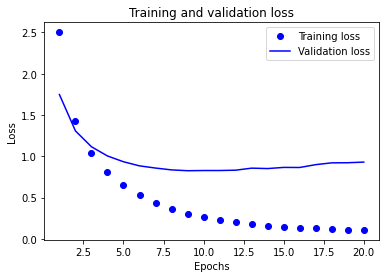

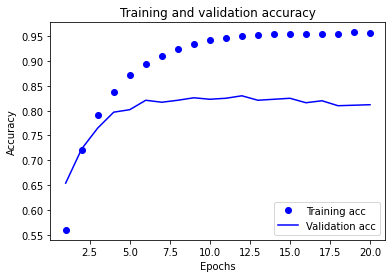

In [18]:
train(build_model())

elapsed 2.15s
loss[0]: 3.4285783767700195, loss[-1]: 0.9856381416320801
accuracy[0]: 0.3818591833114624, accuracy[-1]: 0.776872992515564
val_loss[0]: 3.1069247722625732, val_loss[-1]: 1.1951508522033691
val_accuracy[0]: 0.5490000247955322, val_accuracy[-1]: 0.7279999852180481


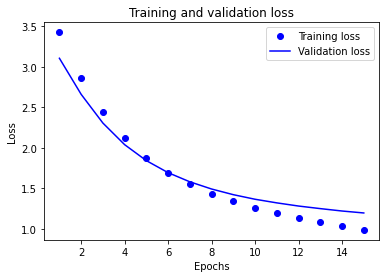

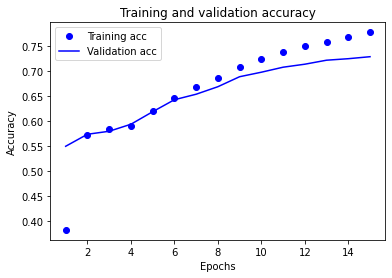

In [21]:
train(build_model(layer_size = 8), epochs = 15)

elapsed 2.69s
loss[0]: 2.7625792026519775, loss[-1]: 0.1678631752729416
accuracy[0]: 0.5413430333137512, accuracy[-1]: 0.9535204172134399
val_loss[0]: 2.1166672706604004, val_loss[-1]: 0.8756354451179504
val_accuracy[0]: 0.6309999823570251, val_accuracy[-1]: 0.8169999718666077


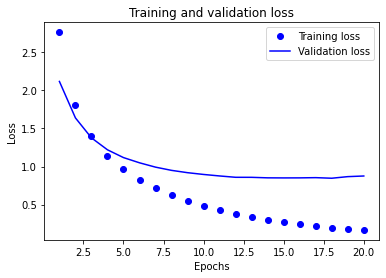

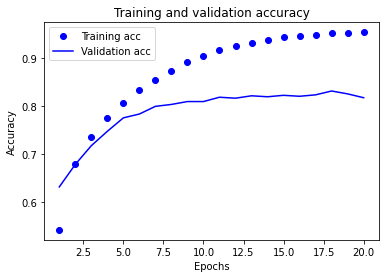

In [22]:
train(build_model(layer_size = 32), epochs = 20)

elapsed 2.69s
loss[0]: 2.1913373470306396, loss[-1]: 0.1040600836277008
accuracy[0]: 0.6052367687225342, accuracy[-1]: 0.9571536183357239
val_loss[0]: 1.4347697496414185, val_loss[-1]: 1.0413095951080322
val_accuracy[0]: 0.7009999752044678, val_accuracy[-1]: 0.8069999814033508


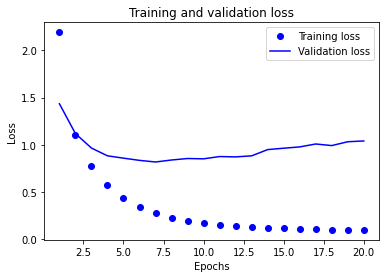

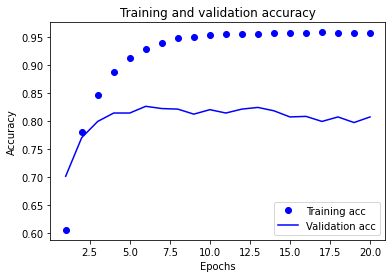

In [23]:
train(build_model(layer_size = 128, layer_count = 5), epochs = 20)

elapsed 2.54s
loss[0]: 2.9938061237335205, loss[-1]: 0.17178700864315033
accuracy[0]: 0.5286895632743835, accuracy[-1]: 0.9533951282501221
val_loss[0]: 2.3446044921875, val_loss[-1]: 0.8712645769119263
val_accuracy[0]: 0.6240000128746033, val_accuracy[-1]: 0.8270000219345093


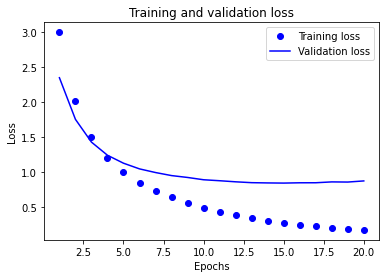

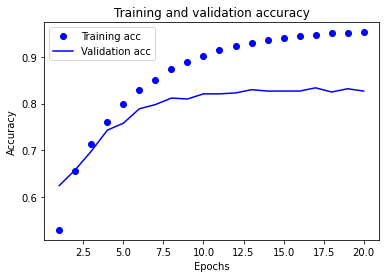

In [24]:
train(build_model(layer_size = 32, layer_count = 1), epochs = 20)